# Soal No 1
# <p style="text-align: center;"> Uji Chi Square (2x2) </p>

Adalah Uji Statistik yang digunakan dalam analisis tabel kontingensi yang bertujuan untuk menguji apakah terdapat hubungan dalam dua variabel kategorik
dimana asumsinya frekuensi harapan (expected count) untuk setiap sel minimal 5 atau lebih. Dengan kata lain data yang terlibat dalam uji Pearson Chi-square haruslah banyak. <br/>
Pada uji ini, subjek diklasifikasi menurut dua variabel yaitu D (disease) dan E (exposure), yang diukur pada saat yang sama. Data hasil pengukuran diringkaskan dalam tabel berikut.

<center>

|             |    Disease 1   |    Disease 2   |          Total     |
|:-----------:|:--------------:|:--------------:|:------------------:|
| Eksposure 1 |      x_11      |      x_12      |x_11+x_12|
| Eksposure 2 |      x_21      |      x_22      |x_21+x_22|
|    Total    | x_11+x_21| x_12+x_22| N       |

</center>

Dengan total besar sampel n adalah yang fixed dalam studi ini. <br/> <br/>
Statistik uji yang digunakan untuk mengetaui adanya hubungan atau asosiasi antara exposure dengan disease adalah :
$$\chi^{2} = \sum_{x = a}^{b} \frac{(F_o-F_e)^2}{F_e}$$

Keterangan : 
1. $F_o$ : Frekuensi Observed (Frekuensi Asli)
2. $F_e$ : Frekuensi Expecter (Frekuensi Harapan)

Dengan :

$$F_e = \frac{\text{Total  baris}*\text{Total kolom}}{\text{Total Sample}}$$

Jika tidak ada hubungan antara exposure dengan disease, maka $\chi^2$ mengikuti distribusi chi-square dengan derajat bebas $1$. Dengan menggunakan tabel distribusi ini dapat digunakan untuk memperoleh tingkat signifikansi (P-values). <br/>Ukuran asosiasi yang digunakan dalam uji ini adalah OR (Odds Ratio) yang didefinisikan sebagai :

$$OR = \frac{x_{11}*x_{22}}{x_{12}*x_{21}}$$

Pengambilan kesimpulan untuk uji ini ada 2 yaitu :
1. Menggunakan interval konfidensi dari OR yaitu :
    * Jika Interval Konfidensi  melewati angka 1 → tidak ada hubungan 
    * Jika Interval Konfidensi tidak melewati angka 1 → ada hubungan

    Dengan :
    $$CI_{OR} = e^{[ln(OR) \pm 1.96\sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}]} $$

    <br/>
2. Menggunakan P-Value atau Nilai $\chi^2$ 

Hipotesis untuk test ini adalah :

* $H_0$ : Tidak ada hubungan antara eksposure dan disease <br/>
* $H_1$ : ada hubungan antara eksposure dan disease <br/>

$H_0$ ditolak jika : 
* $\chi^2_{hit} > \chi^2_{tab}$  atau $P_{value}$ < 0.05
* Interval Konfidensi tidak melewati angka 1

# Instruksi :
Diketahui rangkuman data sebagai berikut :

<center>

|             |    Sakit Perut Ya   |    Sakit Perut Tidak   |
|:-----------:|:--------------:|:--------------:|
| Makan Sambal Ya |      109      |      116      |
| Makan Sambal Tidak |      4      |      84      |

</center>
Bagaimana pengaruh konsumsi sambal terhadap ya tidaknya terjadi sakit perut?

Carilah :
* Frekuensi harapan masing masing data
* Chi Square Value
* P-Value
* Critical Value
* Odds Ratio
* Lower Confidence Interval
* Upper Confidence Interval

# Batasan !
* Dilarang menggunakan fungsi selain yang sudah didefinisikan dalam soal ! kecuali untuk bebrapa fungsi berikut :
    * np.sum()
    * np.zeros()
    * np.exp()
    * np.array()
    * np.sqrt()
* Dilarang men-assign object/variabel dengan skalar/konstanta saja atau dengan kata lain menggunakan hasil perhitungan manual ! 
    Contoh  x = 1

# Output Contoh 
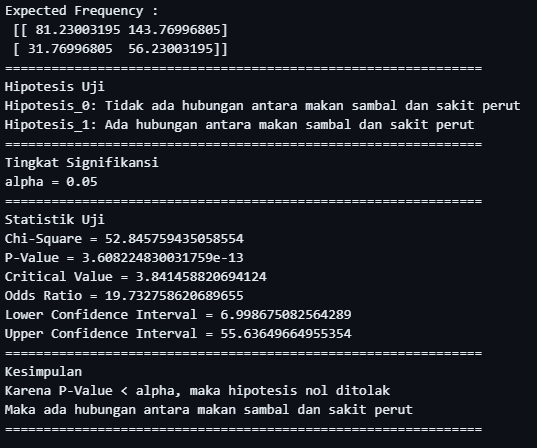

In [2]:
# Don't edit this cell, just run it !
import numpy as np
from scipy import stats

In [3]:
# Graded Line 
# Define the data 
data = np.array([[109, 116], [4,84]]) # Replace None with the data points

In [4]:
from IPython.core.display import JSON
# Graded Function
# Function : find expected frequency
def expected_frequency(data):
    """Function to find the expected frequency of the data points in the contingency table.
    Args:
        data (numpy.ndarray): Data points in the contingency table.
    Returns:
        numpy.ndarray: Expected frequency of the data points in the contingency table.
    """
    # Your Code Starts Here
    # Calculate the total number of observations
    total_sample = np.sum(data)

    # Calculate the row-wise sum of the data
    total_row = []
    for i in range(len(data)):
      total_row.append(np.sum(data[i,:]))

    # Calculate the column-wise sum of the data
    total_column = []
    for j in range(len(data)):
      total_column.append(np.sum(data[:,j]))

    # Create an empty array to store the expected frequency
    Fe = []
 
    # Iterate over the rows data
    for i in range(len(data)):
        Fe1 = []
        # iterate over the columns data
        for j in range(len(data)):
            # Calculate the expected frequency for each cell
            Fe1.append((total_row[i]*total_column[j])/total_sample)
        Fe.append(Fe1)
    # Your Code Here
    # Replace None with the correct return statement
    return np.array(Fe)

In [5]:
# Graded Function
# Function : find chi-square value
def chi_square(data):
    """ Function to find the chi-square value of the data points in the contingency table.

    Args:
        data (numpy.ndarray): Data points in the contingency table.
    
    Returns:
        float: Chi-square value of the data points in the contingency table.
    """
    # You can use the function expected_frequency to calculate the expected frequency
    # Your code starts here
    chi_square_value = 0

    # Calculate the expected frequency
    Fe = expected_frequency(data)
    
    # Calculate the chi-square value
    for i in range(len(data)):
      for j in range(len(data)):
        chi_square_value += ((data[i,j]-Fe[i,j])**2)/Fe[i,j]

    # Your code ends here
    # Replace None with the correct return statement
    return chi_square_value

In [6]:
# Graded Function
# Function : find p-value
def p_value(data):
    """ Function to find the p-value of the data points in the contingency table.

    Args:
        data (numpy.ndarray): Data points in the contingency table.
    
    Returns:
        float: P-value of the data points in the contingency table.
    """
    # You can use the function chi_square to calculate the chi-square value
    # Your code starts here
    dof = (len(data)-1)*(len(data)-1)

    chi_square_value = chi_square(data)
    # Calculate the p-value
    p_value = 1 - stats.chi2.cdf(chi_square_value, dof)

    # Your code ends here
    # Replace None with the correct return statement
    return p_value

In [7]:
# Graded Function
# Function : find critical value
def critical_value(data, alpha):
    """ Function to find the critical value of the data points in the contingency table.

    Args:
        data (numpy.ndarray): Data points in the contingency table.
        alpha (float): Significance level.
    
    Returns:
        float: Critical value of the data points in the contingency table.

    Hints : dof=degree of freedom (defined by calculating the number of rows and columns in the contingency table)
    """
    # You can use the function chi_square to calculate the chi-square value
    # Your code starts here

    dof = (len(data)-1)*(len(data)-1)

    # Calculate the critical value
    critical_value_data = stats.chi2.ppf(1-alpha, dof)

    # Your code ends here
    # Replace None with the correct return statement
    return critical_value_data

In [8]:
# Graded Function
# Function : find Odds Ratio
def odds_ratio(data):
    """ Function to find the odds ratio of the data points in the contingency table.

    Args:
        data (numpy.ndarray): Data points in the contingency table.
    
    Returns:
        float: Odds ratio of the data points in the contingency table.
    """
    # Your code starts here
    
    odds_ratio = (data[0,0]*data[1,1])/(data[1,0]*data[0,1])

    # Your code ends here
    # Replace None with the correct return statement
    return odds_ratio


In [22]:
# Graded Function
# Function : find Confidence Interval for Odds Ratio
def confidence_interval(data, alpha):
    """ Function to find the confidence interval of the odds ratio of the data points in the contingency table.

    Args:
        data (numpy.ndarray): Data points in the contingency table.
        alpha (float): Significance level.
    
    Returns:
        tuple: Confidence interval of the odds ratio of the data points in the contingency table.
        Lower Confidence Interval, Upper Confidence Interval
    """
    # Your code starts here
    oye = 0
    for i in range(len(data)):
      for j in range(len(data)):
        oye += 1/data[i,j]
        oya = np.sqrt(oye)
    z = stats.norm.ppf(1-(0.05/2))
    
    # Calculate the confidence interval
    LCI = (odds_ratio(data))/np.exp(z*oya)
    UCI = (odds_ratio(data))*np.exp(z*oya)

    # Your end starts here
    # Replace None with the correct return statement
    return (LCI, UCI)

In [23]:
# Output
# Print the expected frequency
print("Expected Frequency : \n", expected_frequency(data))

# Hasil Pengujian
print("==============================================================")
print("Hipotesis Uji")
print("Hipotesis_0: Tidak ada hubungan antara makan sambal dan sakit perut")
print("Hipotesis_1: Ada hubungan antara makan sambal dan sakit perut")
print("==============================================================")
print("Tingkat Signifikansi")
print(f"alpha = {0.05}")
print("==============================================================")
print("Statistik Uji")
print(f"Chi-Square = {chi_square(data)}")
print(f"P-Value = {p_value(data)}")
print(f"Critical Value = {critical_value(data, 0.05)}")
print(f"Odds Ratio = {odds_ratio(data)}")
print(f"Lower Confidence Interval = {confidence_interval(data, 0.05)[0]}")
print(f"Upper Confidence Interval = {confidence_interval(data, 0.05)[1]}")
print("==============================================================")
print("Kesimpulan")
if p_value(data) < 0.05:
    print("Karena P-Value < alpha, maka hipotesis nol ditolak")
    print("Maka ada hubungan antara makan sambal dan sakit perut")
else:
    print("Karena P-Value > alpha, maka hipotesis nol diterima")
    print("Maka tidak ada hubungan antara makan sambal dan sakit perut")
print("==============================================================")

Expected Frequency : 
 [[ 81.23003195 143.76996805]
 [ 31.76996805  56.23003195]]
Hipotesis Uji
Hipotesis_0: Tidak ada hubungan antara makan sambal dan sakit perut
Hipotesis_1: Ada hubungan antara makan sambal dan sakit perut
Tingkat Signifikansi
alpha = 0.05
Statistik Uji
Chi-Square = 52.845759435058554
P-Value = 3.608224830031759e-13
Critical Value = 3.841458820694124
Odds Ratio = 19.732758620689655
Lower Confidence Interval = 6.998675082564288
Upper Confidence Interval = 55.63649664955354
Kesimpulan
Karena P-Value < alpha, maka hipotesis nol ditolak
Maka ada hubungan antara makan sambal dan sakit perut


# Soal No 2

Susunlah sebuah ringkasan singkat mengenai Hamming distance beserta penjelasan bagaimana cara perhitungan ukuran tersebut. Apa pendapat Anda mengenai ukuran ini jika dibandingkan dengan ukuran kemiripan/ketakmiripan lainnya yang sudah Anda pelajari?

Di bawah ini terdapat fungsi hamming_distance yang merupakan implementasi sederhana di python. Berikan komentar (comment) yang berisi penjelasan setiap bagian code di bawah.

In [11]:
# Fungsi pengukur hamming distance
def hamming_distance(string_1, string_2): #pendefinisian fungsi hamming_distance dengan dua parameter string
  if len(string_1) != len(string_2): #kondisi apabila kedua string tidak memiliki jumlah yang sama
    print("Strings must be of equal length.") #output dari kondisi di atas
  dist_counter = 0 #membuat variabel bernilai 0 (NULL)
  for n in range(len(string_1)): #iterasi n sebanyak range jumlah string_1
    if string_1[n] != string_2[n]: #kondisi apabila string_1 indeks ke-n tidak sama dengan string_2 indeks ke-n
      dist_counter += 1 #apabila kondisi di atas terpenuhi, setiap kali iterasi, dist_counter ditambah 1
  return dist_counter #output fungsi hamming_distance 

In [ ]:
# Contoh 1 (Contoh tidak perlu diberi comment)
string_1 = "budi seorang mahasiswa"
string_2 = "luna seorang mahasiswi"
print(hamming_distance(string_1, string_2))

In [ ]:
# Contoh 2 (Contoh tidak perlu diberi comment)
string_1 = "semafore"
string_2 = "semapore"
print(hamming_distance(string_1, string_2))

In [ ]:
# Contoh 3 (Contoh tidak perlu diberi comment)
string_1 = "sempre milan"
string_2 = "sempre inter"
print(hamming_distance(string_1, string_2))

In [ ]:
# Contoh 4 (Contoh tidak perlu diberi comment)
string_1 = "m zaki nurkholis"
string_2 = "hasan zein"
print(hamming_distance(string_1, string_2)) #error karena panjang string berbeda

Salah satu aplikasi dari ukuran ini adalah dalam typographical error detection (typo). Sebagai contoh, kata "menerima" dapat secara tidak sengaja ditulis sebagai "menerims". Nilai hamming distance nya adalah 1, yang berarti terdapat 1 huruf yang berbeda.

Susunlah sebuah fungsi yang dapat memperbaiki typo dalam sebuah kalimat dengan menggunakan hamming distance. Uji fungsi yang telah Anda susun untuk memperbaiki kalimat-kalimat berikut. Tampilkan kalimat yang sudah diperbaiki.

- aku asalah seornag mahssiswa
- kacamsta adalah sebuah alat bsntu penhlihatan bagi pendertia rabun jauh

Hint: Anda diberikan sebuah list yang berisi kata yang sering mengalami typo. Bandingkan masing-masing kata dalam kalimat diatas dengan kata yang tertera dalam list. Jika nilai Hamming distance nya <= 2, maka kemungkinan besar kata tersebut mengalami typo.

Contoh:

Kalimat yang diuji = 'sagu dua tgia'

Kamus yang diberikan = ['satu', 'dua', 'tiga', 'empat']

Cek kata pertama yaitu 'sagu' terhadap kamus. 
- Hamming distance 'sagu' dengan 'satu' adalah 1
- Hamming distance 'sagu' dengan 'dua' tidak dapat dihitung karena perbedaan jumlah kata
- Hamming distance 'satu' dengan 'tiga' adalah 3
- Hamming distance 'satu' dengan 'empat' tidak dapat dihitung karena perbedaan jumlah kata

Hamming distance terkecil adalah 1. Karena perbedaannya hanya pada 1 huruf, kemungkinan besar telah terjadi typo. Oleh karenanya, kita koreksi kata 'sagu' dengan 'satu'. 

Lakukan hal yang sama terhadap kata lainnya, yaitu 'dua' dan 'tgia'.

Catatan: apabila kata yang typo tidak terdapat di kamus, maka tidak perlu diperbaiki (biarkan saja).

In [13]:
kamus = ['motor', 'penglihatan', 'mobil', 'pesawat', 'aku', 'kacamata', 'adalah', 'kuda', 'penderita', 'seorang', 'mahasiswa', 'menderita', 'bantu']
kalimat_1 = 'aku asalah seornag mahssiswa'
kalimat_2 = 'kacamsta adalah sebuah alat bsntu penhlihatan bagi pendertia rabun jauh'

def cek_typo(kalimat):
  kata = kalimat.split() #string kalimat dipisah per kata
  kalimat = []
  for i in kata:
    if i in kamus:
      kalimat.append(i) #apabila kata sudah terdapat dalam kamus, akan dimasukkan ke array kalimat
    else:
      kata_mirip = []
      for j in kamus:
        if len(i) == len(j): #apabila jumlah kata sama dengan ada di kamus
          hamming = hamming_distance(j,i)
          if hamming <= 2: #kata disebut typo apabila jumlah hamming <= 2
            kata_mirip.append(j) #kata pada kamus dimasukkan ke array kata_mirip
      if kata_mirip:
        kalimat.append(kata_mirip[0]) #memasukkan kata_mirip[0] pada array kalimat
      else:
        kalimat.append(i) 
  kalimat_benar = " ".join(kalimat) #menggabungkan kata yang terkumpul pada array kalimat menjadi sebuah kalimat_benar
  return kalimat_benar

In [14]:
cek_typo(kalimat_1) #membenarkan typo kalimat_1

'aku adalah seorang mahasiswa'

In [15]:
cek_typo(kalimat_2) #membenarkan typo kalimat_2

'kacamata adalah sebuah alat bantu penglihatan bagi penderita rabun jauh'

# Soal No 3

Anda diberikan sebuah dataset yang berisi catatan penjualan sebuah mall. Sebagai seorang ahli data, seorang stakeholder meminta Anda untuk menyajikan data harian dan bulanan sesuai dengan kriteria tertentu.

A. Sajikan sebuah tabel yang berisi Sales dan Profit harian dari setiap jenis kategori produk (Category).

B. Sajikan sebuah tabel yang berisi jumlah produk terjual (quantity) bulanan dari setiap Segment yang dikelompokkan berdasarkan Region.

Catatan: Date yang digunakan adalah Order Date

In [16]:
!pip install pandas
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd

df = pd.read_excel('Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


A. Sajikan sebuah tabel yang berisi Sales dan Profit harian dari setiap jenis kategori produk (Category).

In [18]:
df_sales_profit = df[['Category','Sales','Profit']]
df_sales_profit.groupby('Category').sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


B. Sajikan sebuah tabel yang berisi jumlah produk terjual (quantity) bulanan dari setiap Segment yang dikelompokkan berdasarkan Region.

In [19]:
df['Month'] = pd.to_datetime(df['Order Date']).dt.strftime('%B')
df_b = df[['Month','Quantity','Segment','Region']]

df_b.groupby(['Region','Segment','Month']).sum()

Quantity
Region  Segment     Month              
Central Consumer    April           298
                    August          286
                    December        600
                    February        131
                    January         230
...                                 ...
West    Home Office March           188
                    May             141
                    November        316
                    October         215
                    September       218

[144 rows x 1 columns]

# Soal 4
# **$Association Rules$**

You are asked to create a Movie Recommendation System using Association Rules for a given dataset. The given dataset is Movie lens dataset. The dataset lists movies, user ratings, tags, etc. You are asked to build a recommendation system that can provide recommendations for movies that customers may want to see based on movies that have been seen before.<br>
We will be using Movie Lens dataset (ml-25m) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 27753444 ratings and 1,129 tag applications across 62,000 movies. These data were created by 162,000 users released December 2019.

<span style="color:red">**Your Task is as Follows:**</span><br>
- Preprocess the dataset to create a transactional list were every row represent a user and his selected movies
- Transform the preprocessed movie merge list into binary input
- Frequent Itemset Mining: Use FP-Growth and Apriori algorithms to find items that frequently co-occur in the dataset
    - Code Apriori Algorithm
    - Make Explanation about the result
    - Code FP-Growth Algorithm
    - Make Explanation about the result
- Use the discovered frequent itemset to find association rules between items that appear together in the dataset.
    - Code Association Rules
    - Sort value by confidence and lift
    - Make Explanation about the result
- Run All Code

Write your code in the $pass$ and dont change the variabels name

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# $Dataset$

## Importing Dataset

In [2]:
#Download Data Using request, must be executed, and will add the dataset to your main directory.
import requests, zipfile, io
zipfile.ZipFile(io.BytesIO(requests.get('https://files.grouplens.org/datasets/movielens/ml-25m.zip').content)).extractall()

## Selecting Data

In [3]:
ls -a ml-25m

./   genome-scores.csv  links.csv   ratings.csv  tags.csv
../  genome-tags.csv    movies.csv  README.txt


In [4]:
data_movies = pd.read_csv('ml-25m/movies.csv')
data_tages = pd.read_csv('ml-25m/tags.csv')
data_ratings = pd.read_csv('ml-25m/ratings.csv')

## Exploratory

### **Movies Data** <br>
This is the only dataset that contains the titile of the movies and each movie unique key without Duplicate Value.

In [5]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
data_movies.movieId.value_counts(), print('Number of duplicated unique ids are: ',data_movies.movieId.duplicated().sum())

Number of duplicated unique ids are:  0


(1         1
 162130    1
 162070    1
 162072    1
 162074    1
          ..
 107614    1
 107623    1
 107625    1
 107630    1
 209171    1
 Name: movieId, Length: 62423, dtype: int64,
 None)

### **Movies tages Data** <br>
This dataset contain the added tags to the movie plus the userid which is valuable to be considered as an index to each transaction, on the other hand the dataset has less movie ids than the rating dataset which made us select it instead.

In [7]:
data_tages.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [8]:
data_tages.movieId.value_counts()

260       6180
79132     4767
296       4767
109487    3616
2959      3612
          ... 
128798       1
183647       1
183605       1
128884       1
128534       1
Name: movieId, Length: 45251, dtype: int64

### **Movies Ratings Data** <br>
This dataset contain the added tags to the movie plus the userid which is valuable to be considered as an index to each transaction, on the other hand the dataset has less movie ids than the rating dataset which made us select it instead.

In [9]:
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [10]:
data_ratings.movieId.value_counts()

356       81491
318       81482
296       79672
593       74127
2571      72674
          ...  
193109        1
112393        1
142793        1
111842        1
200728        1
Name: movieId, Length: 59047, dtype: int64

# $Preprocessing$

### **Merging Dataset** <br>
in this case inner join is selected since we need the data only when both movieId labels are existed on both datasets.

In [11]:
merge = data_movies.merge(data_tages,on = 'movieId',how = 'inner')
merge

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned,1515175493
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250,1172144394
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar,1223304727
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel,1223304729
...,...,...,...,...,...,...
1093355,209063,The Prep School Negro (2012),(no genres listed),96399,Philadelphia,1574021180
1093356,209063,The Prep School Negro (2012),(no genres listed),96399,private school,1574021158
1093357,209063,The Prep School Negro (2012),(no genres listed),96399,quaker,1574021197
1093358,209063,The Prep School Negro (2012),(no genres listed),96399,racism,1574021194


### **Drop Variable** <br>
Dropping Unneeded Columns

In [12]:
merge.drop(columns=['tag','timestamp','genres'],inplace=True)

In [13]:
merge

,movieId,title,userId
0,1,Toy Story (1995),791
1,1,Toy Story (1995),1048
2,1,Toy Story (1995),1361
3,1,Toy Story (1995),3164
4,1,Toy Story (1995),3164
...,...,...,...
1093355,209063,The Prep School Negro (2012),96399
1093356,209063,The Prep School Negro (2012),96399
1093357,209063,The Prep School Negro (2012),96399
1093358,209063,The Prep School Negro (2012),96399


In [14]:
len(merge.userId.unique()) 

14592

<span style="color:blue">**Code Task 1**</span><br>

Here you can preprocess the dataset to create a transactional list were every row represent a user and his selected movies using groupby

In [15]:
merge_list = merge.groupby(['userId'])['title'].apply(list).reset_index()

merge_list.head()

,userId,title
0,3,"[Star Wars: Episode IV - A New Hope (1977), St..."
1,4,"[Big Lebowski, The (1998), Big Lebowski, The (..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]


Let's validate the created list per userId

In [16]:
print(len(merge.userId.unique()))
print(len(merge_list))

14592
14592


In [17]:
merge_list

,userId,title
0,3,"[Star Wars: Episode IV - A New Hope (1977), St..."
1,4,"[Big Lebowski, The (1998), Big Lebowski, The (..."
2,19,"[Rosemary's Baby (1968), Nausicaä of the Valle..."
3,20,[Star Wars: Episode VI - Return of the Jedi (1...
4,43,[Cliffhanger (1993)]
...,...,...
14587,162495,[Forgetting Sarah Marshall (2008)]
14588,162501,"[Gone Girl (2014), Gone Girl (2014), Gone Girl..."
14589,162512,"[Postman, The (1997), Patriot Games (1992)]"
14590,162521,"[Shaun of the Dead (2004), Hot Fuzz (2007), Dr..."


### **Transforming Data** <br>
Here data is transfered as a binary input to be accepted by the algorithm.<br>
Your Task is to transform the data into binary input with methods you had explore and name it df

<span style="color:blue">**Code Task 2**</span><br>
You can use all package you had explore

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
binarized_genres = mlb.fit_transform(merge_list['title'])

# create a new dataframe with the binarized genres
binarized_df = pd.DataFrame(binarized_genres, columns=mlb.classes_)
df = pd.concat([binarized_df], axis=1)

df

,"""Great Performances"" Cats (1998)",#1 Cheerleader Camp (2010),#Captured (2017),#FollowMe (2019),#Horror (2015),#Stuck (2014),#realityhigh (2017),$ (Dollars) (1971),"$1,000 on the Black (1966)","$100,000 for Ringo (1965)",$9.99 (2008),$ellebrity (Sellebrity) (2012),'49-'17 (1917),'63 Boycott (2016),'68 (1988),'71 (2014),'Gator Bait (1974),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Master Harold' ... And the Boys (2010),'Neath Brooklyn Bridge (1942),'Neath the Arizona Skies (1934),'Pimpernel' Smith (1941),'R Xmas (2001),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Twas the Night (2001),'Twas the Night Before Christmas (1974),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),(A)sexual (2011),(Dis)Honesty: The Truth About Lies (2015),(T)ERROR (2015),(The New) War of the Buttons (2011),(Untitled) (2009),*batteries not included (1987),+1 (2013),...All the Marbles (1981),...And God Spoke (1993),...And Justice for All (1979),...First Do No Harm (1997),...ing (2003),...tick... tick... tick... (1970),.45 (2006),.hack Liminality: In the Case of Mai Minase,.hack//Beyond the World (2012),008: Operation Exterminate (1966),009 Re: Cyborg (2012),009-1: The End of the Beginning (2013),1 (2013),1 (2014),1 Buck (2017),1 Chance 2 Dance (2014),1 Night (2017),1. Mai (2008),10 (1979),10 Billion: What's On Your Plate (2015),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Days in a Madhouse (2015),10 Items or Less (2006),10 Questions for the Dalai Lama (2006),10 Rillington Place (1971),10 Rules for Sleeping Around (2013),10 Things I Hate About You (1999),10 Years (2011),10 minutes (10 minuta) (2002),10 to Midnight (1983),10%: What Makes a Hero? (2013),10+10 (2011),"10,000 BC (2008)","10,000 Black Men Named George (2002)","10,000 Dollars for a Massacre (1967)",10.0 Earthquake (2014),100 Bloody Acres (2012),100 Days (1991),100 Days Before the Command (1991),100 Days Of Love (2015),100 Days With Mr. Arrogant (2004),100 Degrees Below Zero (2013),100 Dinge (2018),100 Feet (2008),100 Girls (2000),100 Men and a Girl (One Hundred Men and a Girl) (1937),100 Million BC (2008),100 Poems for Stella (2017),100 Rifles (1969),100 Streets (2016),100 Women (2002),100 Years at the Movies (1994),100 Yen Love (2014),100 Yen: The Japanese Arcade Experience (2012),100 metros (2016),100% Love (2011),"1000 Eyes of Dr. Mabuse, The (Die 1000 Augen des Dr. Mabuse) (1960)",1000 Journals (2007),1001 Nights (1990),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Rent Boys (2000),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),102 Minutes That Changed America (2008),10th & Wolf (2006),"10th Victim, The (La decima vittima) (1965)",10x10 (2018),11 Blocks (2015),11 Days 11 Nights Part 3 (1989),11 Days 11 Nights: Part 1 - Fantasy Becomes Reality (1987),"11 Days, 11 Nights 2 (1990)",11 Harrowhouse (1974),11 Minutes (2015),11 September Vragen (2016),11 x 14 (1977),"11'09""01 - September 11 (2002)",11-11-11 (11-11-11: The Prophecy) (2011),11.22.63 (2016),11/11/11 (2011),11:00 AM (2013),11:14 (2003),11:59 (2005),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Dates of Christmas (2011),12 Days of Christmas Eve (2004),"12 Dogs of Christmas, The (2005)",12 Feet Deep (2016),12 Gifts of Christmas (2015),12 Men of Christmas (2009),12 O'Clock Boys (2013),12 Rounds (2009),12 Rounds 3: Lockdown (2015),12 Storeys (Shier lou) (1997),12 Strong (2018),12 Wishes of Christmas (2011),12 Years a Slave (2013),12 registi per 12 città (1989),12 to the Moon (1960),120 (2008),120 Beats Per Minute (2017),125 Years Memory (2015),127 Hours (2010),12:01 (1993),12:08 East of Bucharest (A fost sau n-a fost?) (2006),12th & Delaware (2010),13 (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Beloved (13 game sayawng) (2006),13 Cameras (2015),13 Eerie (2013),13 Figh

In [19]:
df.shape

(14592, 45208)

# $Process$

## Frequent Items <br>
This section implement the use of the itemsets generation according to the selected parameters. <br>

### **Apriori** <br>
your task is to code Apriori with 1% minimum support value, and give explanation from the result

<span style="color:blue">**Code Task 3**</span><br>

In [ ]:
from mlxtend.frequent_patterns import apriori
apriori_frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [ ]:
apriori_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

In [ ]:
apriori_frequent_itemsets['support'].describe()

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

Dengan mengimport apriori dari mlxtend, apriori_frequent_itemsets dapat dihitung menggunakan fungsi apriori() dengan minimum supportnya 1% atau 0.01. Kemudian, dari apriori_frequent_itemsets pada kolom 'itemsets', dengan apply, fungsi lambda digunakan untuk mengambil satu argumen x. Argumen tersebut akan dihitung dengan menggunakan value_counts() untuk mengetahui jumlahnya.

*output tidak keluar karena kena limit

### **Fpgrowth** <br>
your task is to code Fpgrowth from frequent itemset with 1% minimum support value threshold, and give explanation from the result

<span style="color:blue">**Code Task 4**</span><br>

In [ ]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth_frequent_itemsets = fpgrowth(apriori_frequent_itemsets, min_support=0.01, use_colnames=True)

In [ ]:
fpgrowth_frequent_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

In [ ]:
fpgrowth_frequent_itemsets['support'].describe()

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

Hampir sama dengan apriori sebelumnya, dengan mengimport fpgrowth dari mlxtend, fpgrowth_frequent_itemsets dapat dihitung menggunakan fungsi fpgrowth() dengan minimum supportnya 1% atau 0.01. Kemudian, dari fpgrowth_frequent_itemsets pada kolom 'itemsets', dengan apply, fungsi lambda digunakan untuk mengambil satu argumen x. Argumen tersebut akan dihitung dengan menggunakan value_counts() untuk mengetahui jumlahnya.

*output tidak keluar karena kena limit

## Association Rule<br>
Lets create new feature that can be used for further analysis, Apply the association rules from the result of the previous algorithm

<span style="color:blue">**Code Task 5**</span><br>

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(fpgrowth_frequent_itemsets, metric="lift", min_threshold=0.7)

<span style="color:blue">**Code Task 6**</span><br>
Sort values by confidence and lift

In [ ]:
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

In [ ]:
rules[rules["antecedents"].apply(lambda x: "Inception (2010)" in str(x))].groupby(
    ['antecedents', 'consequents'])[['confidence']].max().sort_values(ascending=False,
                                                                      by='confidence').head(10).plot(kind='bar').invert_xaxis()
plt.title('Top movies that are likley to be watched with inception');

<span style="color:red">**Give Your Explanation Here!**</span>
<br>

Dengan mengimport association_rules dari mlxtend, rules dapat dihitung menggunakan fungsi association_rules() dengan metric lift dan min_threshold=0.7. Kemudian, dari rules akan dilakukan sort_values berdasarkan kolom 'confident' dan 'lift'. Sort_values akan dilakukan secara descending sehingga nilai ascendingnya keduanya 'False'. Selanjutnya, pada dataframe rules kolom "antecedents", digunakan apply untuk isi kolom "Inception (2010)". Data yang sudah didapatkan, akan dijadikan grup dengan groupby() berdasarkan 'antecedents' dan 'consequents'. Output yang dihasilkan yaitu kolom 'confidence' dengan jumlah maksimum. Output ini juga diurutkan dengan sort_values secara descending berdasarkan 'confidence' dan hanya ditampilkan sebanyak 10 data. Data output tersebut akan diberikan judul 'Top movies that are likley to be watched with inception'.

*output tidak keluar karena kena limit

# $Visualize Association Rules with (Networkx)$ <br>
(FYI Exploring the result)<br>to see network visualization between movies based on association rules

In [ ]:
rules['antecedents'] = rules.antecedents.apply(lambda x: next(iter(x)))
rules['consequents'] = rules.consequents.apply(lambda x: next(iter(x)))

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import networkx as nx
import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

# Create a Plotly figure
fig = go.Figure()

edges = nx.from_pandas_edgelist(rules.sort_values(ascending=False,by='lift')
                           ,source='antecedents',target='consequents',edge_attr=None)
pos = nx.spring_layout(edges, seed=42)  # use spring_layout instead
# Add edges as scatter trace
edge_x = []
edge_y = []
for edge in edges.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

fig.add_trace(edge_trace)

# Add nodes as scatter trace
node_x = []
node_y = []
node_text = []
for node in edges.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        line_width=2))

node_trace.text = node_text
fig.add_trace(node_trace)

# Set layout and display the figure
fig.update_layout(
    title='Top 100 movies in term of (lift)',
    title_font_size=25,
    font_size=18,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20,l=5,r=5,t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

iplot(fig)